In [1]:
from pybaseball import statcast
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
from pybaseball import statcast_batter

In [2]:
playerid_lookup('Verlander', 'Justin')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,verlander,justin,434378,verlj001,verlaju01,8700,2005.0,2020.0


In [150]:
jv_stats_whole = statcast_pitcher('2017-01-01', '2020-12-31', 434378)

Gathering Player Data


In [7]:
jv_stats_event = jv_stats_whole[jv_stats_whole['events'].isnull() == False]

In [9]:
jv_stats_event_FF = jv_stats_event[jv_stats_event['pitch_type'] == 'FF']

In [18]:
spin_rate_col = jv_stats_event_FF['release_spin_rate']

In [42]:
wOBA_col = jv_stats_event_FF['woba_value']

In [27]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

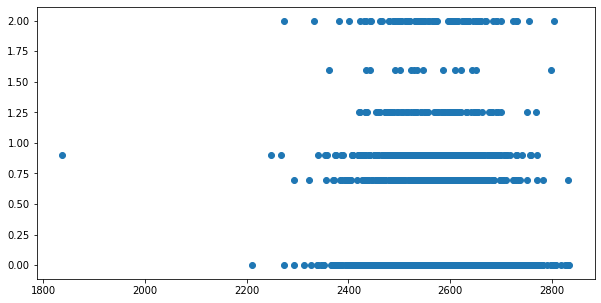

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(spin_rate_col, wOBA_col)

In [34]:
where_are_nans_spin = spin_rate_col.isnull()

In [48]:
spin_rate_checknans = spin_rate_col[where_are_nans_spin == False]
wOBA_checknans = wOBA_col[where_are_nans_spin == False]

In [49]:
st.pearsonr(spin_rate_checknans, wOBA_checknans)

(-0.08368310521106839, 9.649917458633297e-05)

In [72]:
trend = np.polyfit(spin_rate_checknans, wOBA_checknans, deg=1)
print(trend)

[-4.82145814e-04  1.54203850e+00]


Text(0, 0.5, 'wOBA')

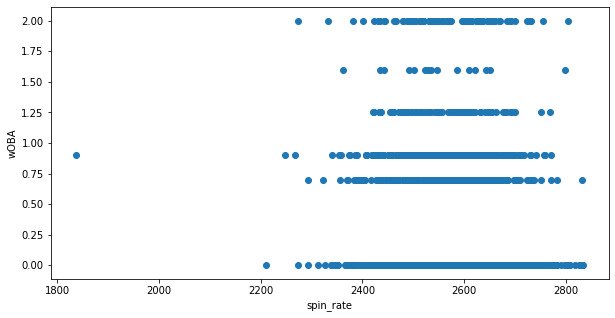

In [125]:
plt.figure(figsize=(10,5))
plt.scatter(spin_rate_col, wOBA_col)
plt.xlabel('spin_rate')
plt.ylabel('wOBA')

In [74]:
jv_stats_batted_FF = jv_stats_event_FF[jv_stats_event_FF['launch_speed_angle'].isnull() == False]


In [152]:
spin_rate_batted_col = jv_stats_batted_FF['release_spin_rate']
xwOBA_batted_col = jv_stats_batted_FF['estimated_woba_using_speedangle']
velocity_batted_col = jv_stats_batted_FF['release_speed']

In [79]:
where_are_nans_spin = spin_rate_batted_col.isnull()

In [153]:
spin_rate_batted_checknans = spin_rate_batted_col[where_are_nans_spin == False]
xwOBA_batted_checknans = xwOBA_batted_col[where_are_nans_spin == False]
velocity_batted_checknans = velocity_batted_col[where_are_nans_spin == False]

Text(0, 0.5, 'xwOBA')

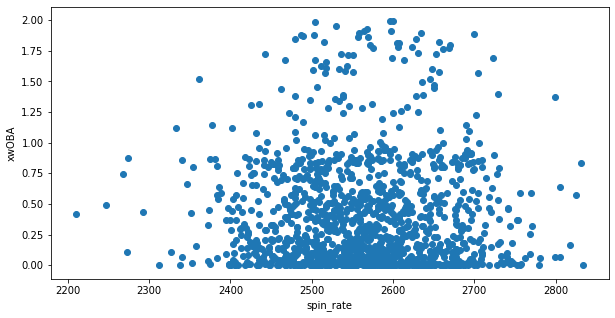

In [124]:
plt.figure(figsize=(10,5))
plt.scatter(spin_rate_batted_checknans, xwOBA_batted_checknans)
plt.xlabel('spin_rate')
plt.ylabel('xwOBA')

Text(0, 0.5, 'xwOBA')

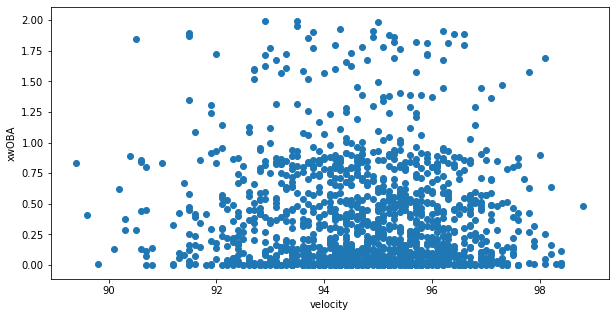

In [154]:
plt.figure(figsize=(10,5))
plt.scatter(velocity_batted_checknans, xwOBA_batted_checknans)
plt.xlabel('velocity')
plt.ylabel('xwOBA')

In [84]:
st.pearsonr(spin_rate_batted_checknans, xwOBA_batted_checknans)

(-0.013271876653315312, 0.6212838513037943)

In [89]:
desc = jv_stats_whole['description'].drop_duplicates()

In [90]:
desc

0                  hit_into_play
1                  called_strike
3                           ball
4                   blocked_ball
6                swinging_strike
10                          foul
55                     foul_bunt
92       swinging_strike_blocked
100                     foul_tip
1337                hit_by_pitch
11922                intent_ball
13048                missed_bunt
14990                   pitchout
Name: description, dtype: object

In [93]:
swing_list = ['hit_into_play', 'swinging_strike', 'foul_bunt', 'swinging_strike_blocked']

jv_stats_swinged = jv_stats_whole[(jv_stats_whole['description'] == 'hit_into_play') | (jv_stats_whole['description'] == 'swinging_strike') | (jv_stats_whole['description'] == 'foul_bunt') | (jv_stats_whole['description'] == 'swinging_strike_blocked')]

In [95]:
jv_stats_whiffed = jv_stats_swinged['description'] != 'hit_into_play'

In [104]:
jv_stats_23 = jv_stats_whiffed[jv_stats_swinged['release_spin_rate'] < 2400]
jv_stats_24 = jv_stats_whiffed[(jv_stats_swinged['release_spin_rate'] >= 2400) & (jv_stats_swinged['release_spin_rate'] < 2500)]
jv_stats_25 = jv_stats_whiffed[(jv_stats_swinged['release_spin_rate'] >= 2500) & (jv_stats_swinged['release_spin_rate'] < 2600)]
jv_stats_26 = jv_stats_whiffed[(jv_stats_swinged['release_spin_rate'] >= 2600) & (jv_stats_swinged['release_spin_rate'] < 2700)]
jv_stats_27 = jv_stats_whiffed[(jv_stats_swinged['release_spin_rate'] >= 2700)]


In [151]:
whiff = np.empty(5)
whiff[0] = sum(jv_stats_23) / len(jv_stats_23)
whiff[1] = sum(jv_stats_24) / len(jv_stats_24)
whiff[2] = sum(jv_stats_25) / len(jv_stats_25)
whiff[3] = sum(jv_stats_26) / len(jv_stats_26)
whiff[4] = sum(jv_stats_27) / len(jv_stats_27)
x = [2350, 2450, 2550, 2650, 2750]
print(whiff)

[0.38973384 0.36554622 0.44989775 0.52245863 0.478     ]


Text(0, 0.5, 'whiff%')

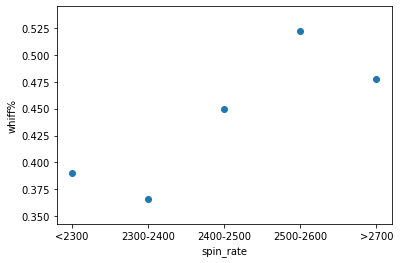

In [123]:
plt.scatter(x, whiff)
plt.xticks(x, ['<2300', '2300-2400', '2400-2500', '2500-2600', '>2700'])
plt.xlabel('spin_rate')
plt.ylabel('whiff%')

In [128]:
spins_whole = jv_stats_swinged['release_spin_rate']
spins_whiffed = spins_whole[jv_stats_whiffed == True]
spins_hit = spins_whole[jv_stats_whiffed == False]

In [132]:
spins_whiffed = spins_whiffed.dropna()
spins_hit = spins_hit.dropna()

In [133]:
st.ttest_ind(spins_whiffed, spins_hit)

Ttest_indResult(statistic=4.6659796512133225, pvalue=3.15209643785124e-06)

In [138]:
x = [spins_whiffed, spins_hit]

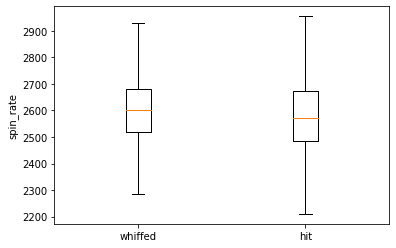

In [149]:
_ = plt.boxplot(x, showfliers = False)
_ = plt.xticks([1, 2], ['whiffed', 'hit'])
_ = plt.ylabel('spin_rate')